<a href="" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/></a>

#Análisis Exploratorio de Datos **Concurso Kopuru Vespa Velutina**


@autor:

        zumaia@uoc.edu

## Batch **LARVAE** resumen

| script | ¿Qué? | ¿Por qué? (Pro) | Sacrificio (Con) |
| -------- | -------- | -------- | -------- |
| Geography (GEO) | Las estaciones del municipio se establecen por proximidad al centro | La estación más cercana es precisa | Las características del terreno y la similitud de los vecinos no se han contabilizado | La estación más cercana es precisa |
| Weather (METEO) | DATAWIG se utiliza para imputar los NaNs | Método muy preciso | No siempre tiene sentido numérico |
| Nests (NESTS) | Datos del nido agrupados por municipio WIDE | produce más directamente lo que el cliente pide como salida | Muchas variables, poco manejables |
| Nests (NESTS) | Bilbao 48020 se asume como cero | Es muy probable que vuelva a ser la cifra reportada en 2020 | No muestra el número real de nidos para el cliente, debemos verificar con los bomberos |

![image.png](../img/Beeswax.jpg)

## Setup

### Packages and coding environment

In [8]:
# Base -----------------------------------
import numpy as np
import pandas as pd
import scipy.stats as ss

In [9]:
# Viz ------------------------------------
!pip install plotnine # in colab
from plotnine import *

### Dataset

In [10]:
WBds03 = 'WBds03_all_the_queens_wasps.csv'
WBdf03 = pd.read_csv(WBds03, sep=",")

In [11]:
WBdf03.dtypes

year_x                    int64
municip_name             object
species                  object
municip_code            float64
month                     int64
year_offset               int64
waspbust_id               int64
colonies_amount         float64
food_fruit              float64
food_apple              float64
food_txakoli            float64
food_kiwi               float64
food_pear               float64
food_blueberry          float64
food_raspberry          float64
station_code             object
index                   float64
MMM                      object
year_y                  float64
station_name             object
code_merge               object
merge_cod                object
weath_days_frost        float64
weath_humidity          float64
weath_maxLevel          float64
weath_midLevel          float64
weath_minLevel          float64
weath_days_rain         float64
weath_days_rain1mm      float64
weath_accuRainfall      float64
weath_10minRainfall     float64
weath_1d

In [12]:
WBdf03['year_offset'] = pd.to_datetime(WBdf03['year_offset'])
WBdf03['nest_foundDate'] = pd.to_datetime(WBdf03['nest_foundDate'])
WBdf03['municip_name'] = WBdf03.municip_name.astype('category')
WBdf03['species'] = WBdf03.species.astype('category')
WBdf03['nest_locType'] = WBdf03.nest_locType.astype('category')
WBdf03['nest_status'] = WBdf03.nest_status.astype('category')
WBdf03["municip_code"] = pd.to_numeric(WBdf03["municip_code"], errors="coerce")
WBdf03['municip_code'] = WBdf03.municip_code.astype('category')
WBdf03['colonies_amount'] = WBdf03.colonies_amount.astype('int64')
WBdf03['food_fruit'] = WBdf03.food_fruit.astype('int64')
WBdf03['food_apple'] = WBdf03.food_apple.astype('int64')
WBdf03['food_txakoli'] = WBdf03.food_txakoli.astype('int64')
WBdf03['food_kiwi'] = WBdf03.food_kiwi.astype('int64')
WBdf03['food_pear'] = WBdf03.food_pear.astype('int64')
WBdf03['food_blueberry'] = WBdf03.food_blueberry.astype('int64')
WBdf03['food_raspberry'] = WBdf03.food_raspberry.astype('int64')
WBdf03['station_code'] = WBdf03.station_code.astype('category')

WBdf03.dtypes

KeyError: 'nest_foundDate'

In [ ]:
WBdf03

,waspbust_id,year_x,nest_foundDate,municip_name,species,nest_locType,nest_hight,nest_diameter,nest_longitude,nest_latitude,nest_status,nest_judgementDate,municip_code,colonies_amount,food_fruit,food_apple,food_txakoli,food_kiwi,food_pear,food_blueberry,food_raspberry,station_code,month,year_offset,index,MMM,year_y,station_name,code_merge,merge_cod,weath_days_frost,weath_humidity,weath_maxLevel,weath_midLevel,weath_minLevel,weath_days_rain,weath_days_rain1mm,weath_accuRainfall,weath_10minRainfall,weath_1dayRainfall,weath_solar,weath_meanTemp,weath_maxTemp,weath_maxMeanTemp,weath_minTemp,weath_meanWindM,weath_maxWindM,weath_meanDayMaxWind
0,1,2019,2019-07-06,Abadiño,Vespa Velutina,Urban Environment,0.0,1.0,"532124,0816","4777436,519",Nest Terminated,2019-06-15 00:00:00,48001.0,160,0,0,0,0,0,0,0,C022,7,1970-01-01 00:00:00.000002018,2722.0,JUL,2018.0,Urkiola,C022_Urkiola_2018_JUL,C022_Urkiola_2018_JUL,0.0,93.1,0.927075,0.416515,0.194796,21.0,11.0,73.7,7.4,18.8,16.400000,17.0,25.5,21.3,13.6,4.900000,36.700000,24.000000
1,2,2019,2019-03-25,Abadiño,Vespa Velutina,Urban Environment,8.0,10.0,"531000,5783","4779715,773",Nest Terminated,2019-03-25 00:00:00,48001.0,160,0,0,0,0,0,0,0,C022,3,1970-01-01 00:00:00.000002018,1086.0,MAR,2018.0,Urkiola,C022_Urkiola_2018_MAR,C022_Urkiola_2018_MAR,10.0,82.4,0.919008,0.336061,0.218927,24.0,18.0,160.0,1.5,19.7,9.300000,5.2,13.9,9.0,2.0,13.900000,82.400000,53.200000
2,3,2019,2019-08-07,Abadiño,Common Wasp,Urban Environment,2.0,2.0,"532159,4404","4779313,024",Nest Terminated,2019-09-07 00:00:00,48001.0,160,0,0,0,0,0,0,0,C022,8,1970-01-01 00:00:00.000002018,3131.0,AGO,2018.0,Urkiola,C022_Urkiola_2018_AGO,C022_Urkiola_2018_AGO,0.0,89.3,0.907257,0.309321,0.191946,13.0,8.0,33.0,0.8,12.7,17.800000,17.0,31.5,22.0,13.0,5.200000,42.100000,25.800000
3,4,2019,2019-07-20,Abadiño,Vespa Velutina,Urban Environment,4.0,20.0,"532457,6901","4777072,989",Nest Terminated,2019-07-20 00:00:00,48001.0,160,0,0,0,0,0,0,0,C022,7,1970-01-01 00:00:00.000002018,2722.0,JUL,2018.0,Urkiola,C022_Urkiola_2018_JUL,C022_Urkiola_2018_JUL,0.0,93.1,0.927075,0.416515,0.194796,21.0,11.0,73.7,7.4,18.8,16.400000,17.0,25.5,21.3,13.6,4.900000,36.700000,24.000000
4,5,2019,2019-06-08,Abadiño,Vespa Velutina,Natural Environment,10.0,30.0,"531388,7069","4777964,231",Nest Terminated,2019-06-08 00:00:00,48001.0,160,0,0,0,0,0,0,0,C022,6,1970-01-01 00:00:00.000002018,2313.0,JUN,2018.0,Urkiola,C022_Urkiola_2018_JUN,C022_Urkiola_2018_JUN,0.0,91.1,0.905733,0.371787,0.198001,20.0,14.0,82.2,6.7,14.0,15.600000,14.3,25.8,18.5,10.6,5.700000,58.300000,26.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677,6786,2019,2019-01-10,Ziortza-Bolibar,Vespa Velutina,Urban Environment,6.0,10.0,NaN,NaN,Nest Terminated,2019-01-10 00:00:00,48915.0,0,21,11,0,0,0,0,0,C0BD,1,1970-01-01 00:00:00.000002018,251.0,ENE,2018.0,Iruzubieta,C0BD_Iruzubieta_2018_ENE,C0BD_Iruzubieta_2018_ENE,0.0,88.3,1.055000,0.420000,0.191993,24.0,23.0,349.3,2.3,49.7,12.495399,8.0,18.5,12.3,4.5,10.880575,77.503281,40.095269
6678,6787,2018,2018-08-23,Ziortza-Bolibar,Vespa Velutina,Natural Environment,10.0,50.0,NaN,NaN,Cannot Terminate,2018-08-28 00:00:00,48915.0,0,21,11,0,0,0,0,0,C0BD,8,1970-01-01 00:00:00.000002017,3010.0,AGO,2017.0,Iruzubieta,C0BD_Iruzubieta_2017_AGO,C0BD_Iruzubieta_2017_AGO,0.0,84.1,0.234000,0.111000,0.167338,15.0,11.0,72.1,6.6,16.3,12.528912,18.9,35.8,24.3,14.1,11.761678,75.672462,40.290805
6679,6788,2018,2018-07-08,Ziortza-Bolibar,Vespa Velutina,Urban Environment,2.0,15.0,"504669,9582","4794126,682",Nest Terminated,2018-09-08 00:00:00,48915.0,0,21,11,0,0,0,0,0,C0BD,7,1970-01-01 00:00:00.000002017,2601.0,JUL,2017.0,Iruzubieta,C0BD_Iruzubieta_2017_JUL,C0BD_Iruzubieta_2017_JUL,0.0,83.3,0.344000,0.130000,0.166257,16.0,7.0,55.3,1.6,18.8,12.524861,18.9,35.9,24.2,14.4,11.668455,75.649403,40.271597
6680,6789,2018,2018-08-23,Ziortza-Bolibar,

### Functions

## General Overview of the Data

In this study we're interested in the **amount of Asian Wasp nests** that can be found in the province of Biscay (northern Spain); specifically broken down by **each of its $112$ municipalities**. Therefore, the population is the total amount of Asian Wasp nests in each municipality of Biscay, while the statistical units are the various nests identified in a sample data set (_WBds03.csv_ or WaspBusters dataset 03) put together from different open data sources made available by Biscay's provincial government.

From the statistics poit of view, this is a **Panel Data** set because it comprises observations of multiple **environmental phenomena** taken over multiple time periods (months from **2017 to 2019**) for the same subjects (identified **wasp/bees nests** in any of the municipalities in the province of Biscay).

In [ ]:
print(f'Sample size = {WBdf03.shape[0]}\n'
      f'Amount of variables = {WBdf03.shape[1]}\n'
      f'Variables = {WBdf03.columns}\n')

Sample size = 6682
Amount of variables = 48
Variables = Index(['waspbust_id', 'year_x', 'nest_foundDate', 'municip_name', 'species',
       'nest_locType', 'nest_hight', 'nest_diameter', 'nest_longitude',
       'nest_latitude', 'nest_status', 'nest_judgementDate', 'municip_code',
       'colonies_amount', 'food_fruit', 'food_apple', 'food_txakoli',
       'food_kiwi', 'food_pear', 'food_blueberry', 'food_raspberry',
       'station_code', 'month', 'year_offset', 'index', 'MMM', 'year_y',
       'station_name', 'code_merge', 'merge_cod', 'weath_days_frost',
       'weath_humidity', 'weath_maxLevel', 'weath_midLevel', 'weath_minLevel',
       'weath_days_rain', 'weath_days_rain1mm', 'weath_accuRainfall',
       'weath_10minRainfall', 'weath_1dayRainfall', 'weath_solar',
       'weath_meanTemp', 'weath_maxTemp', 'weath_maxMeanTemp', 'weath_minTemp',
       'weath_meanWindM', 'weath_maxWindM', 'weath_meanDayMaxWind'],
      dtype='object')



Of the $48$ variables in the _WBds03_ dataset:
* `waspbust_id` is the categorical ordinal variable which, in aggregate, is the response variable we're aiming to predict (in order to get the _amount of wasp nests_ in each municipality, or `municip_code`).
* Ten (`species`, `nest_locType`, `nest_status`, and those whose names begin with "`food_...`") are discrete nominal independent variables.
* `colonies_amount` is a discrete numerical independent variable.
* Seventeen (namely, all those whose names start with "`weath_...`") are continuous numerical independent variables.

And the rest of variables have a mostly auxiliary role in the construction of the _WBds03_ data set, including those related to the dates in which each of the $6,682$ records (i.e. the identification and potential erradication of a wasp **nest**) were registered.

## Categorical Variables

### Species
`species` variable

...

In [ ]:
WBdf03.head()

In [ ]:
WBdf03['year_cat'] = WBdf03['year_x'].astype('category')
WBdf03['month_cat'] = WBdf03['month']
month_num = range(1,13)
month_let = ['Jan' , 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep', 'Oct', 'Nov', 'Dec']
WBdf03.month_cat.replace(to_replace = month_num, value = month_let, inplace = True )

In [ ]:
species_month_df = WBdf03.loc[:,['year_x', 'month', 'species', 'waspbust_id']].groupby(by=['year_x', 'month', 'species'], as_index=False).count()
species_month_df

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:433: PlotnineWarning: position_stack : Removed 1 rows containing missing values.
  data = self.position.setup_data(self.data, params)


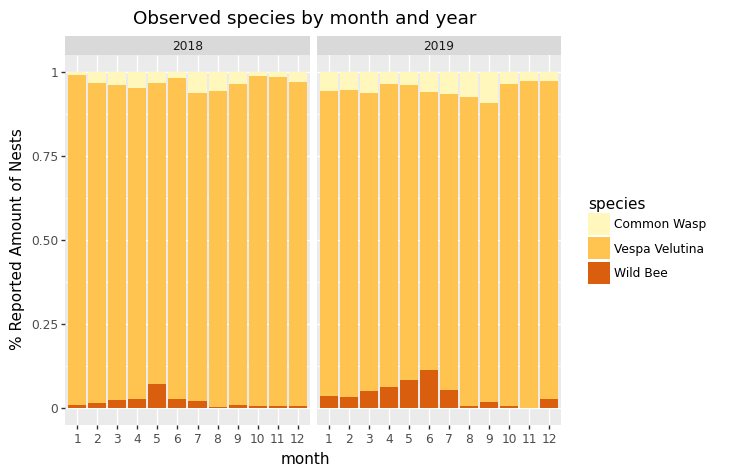

<ggplot: (8736329208653)>

In [ ]:
ggplot(aes(x = 'factor(month)', y = 'waspbust_id', fill = 'species'), species_month_df) + geom_bar(stat='identity', position='fill')\
+ facet_wrap(('year_x'))\
+ xlab("month") + ylab("% Reported Amount of Nests") + ggtitle("Observed species by month and year")\
+ scale_fill_brewer(type='seq', palette='YlOrBr')

### Nest's Location Type
`nest_locType` variable

...

In [ ]:
locType_month_df = WBdf03.loc[WBdf03.species.isin(['Vespa Velutina']),:].loc[:,['year_x', 'month', 'nest_locType', 'waspbust_id']].groupby(by=['year_x', 'month', 'nest_locType'], as_index=False).count()
locType_month_df

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


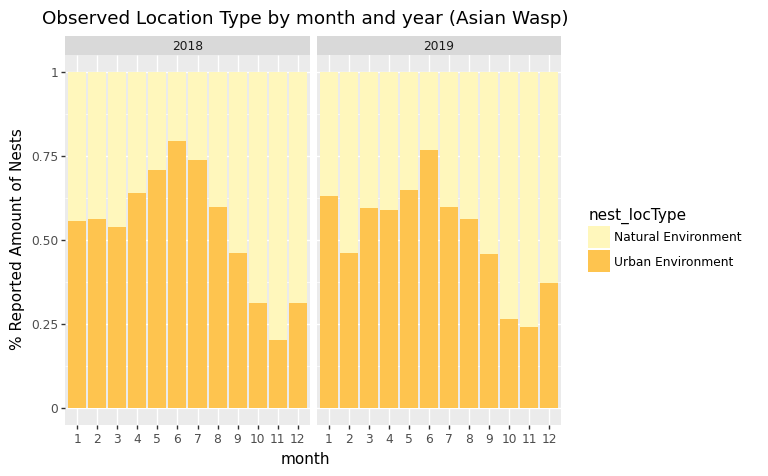

<ggplot: (8736319181185)>

In [ ]:
ggplot(aes(x = 'factor(month)', y = 'waspbust_id', fill = 'nest_locType'), locType_month_df) + geom_bar(stat='identity', position='fill')\
+ facet_wrap(('year_x'))\
+ xlab("month") + ylab("% Reported Amount of Nests") + ggtitle("Observed Location Type by month and year (Asian Wasp)")\
+ scale_fill_brewer(type='seq', palette='YlOrBr')

### Nest's status
`nest_status` variable

...

In [ ]:
nestStatus_month_df = WBdf03.loc[WBdf03.species.isin(['Vespa Velutina']),:].loc[:,['year_x', 'month', 'nest_status', 'waspbust_id']].groupby(by=['year_x', 'month', 'nest_status'], as_index=False).count()
nestStatus_month_df

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:433: PlotnineWarning: position_stack : Removed 13 rows containing missing values.
  data = self.position.setup_data(self.data, params)


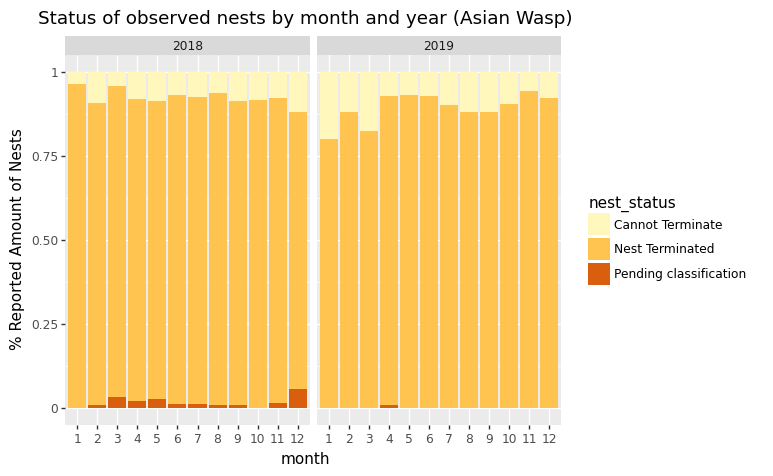

<ggplot: (8736319199105)>

In [ ]:
ggplot(aes(x = 'factor(month)', y = 'waspbust_id', fill = 'nest_status'), nestStatus_month_df) + geom_bar(stat='identity', position='fill')\
+ facet_wrap(('year_x'))\
+ xlab("month") + ylab("% Reported Amount of Nests") + ggtitle("Status of observed nests by month and year (Asian Wasp)")\
+ scale_fill_brewer(type='seq', palette='YlOrBr')

### Food Sources
Variables: `food_fruit`, `food_apple`, `food_txakoli`, `food_kiwi`, `food_pear`, `food_blueberry`, `food_raspberry`,

...

## Numerical Variables

### Bee colonies (another food source)
`colonies_amount` variable

The availability of beekeeper (or apiarist) sites in each municipality does not show any correlation with the amount of Wasp Nests present.

This is evidence by the low correlation coefficients of $0.02$ in 2018 and $0.09$ in 2019 for the `colonies_amount` and the count of `waspbust_id` (reported nests) in each municipality.

In [ ]:
colonies_municip_df = WBdf03.loc[:,['year_x', 'municip_code', 'colonies_amount', 'waspbust_id']].groupby(by=['year_x', 'municip_code', 'colonies_amount'], as_index=False).count()
colonies_municip_df.dropna(how='any', axis=0, inplace=True)
colonies_municip_df

In [ ]:
# 2018 correlation
colonies_municip_df.loc[colonies_municip_df.year_x==2018,:].colonies_amount.corr(colonies_municip_df.loc[colonies_municip_df.year_x==2018,:].waspbust_id)

0.02046256834489273

In [ ]:
# 2019 correlation
colonies_municip_df.loc[colonies_municip_df.year_x==2019,:].colonies_amount.corr(colonies_municip_df.loc[colonies_municip_df.year_x==2019,:].waspbust_id)

0.09306286579791488

A graphical analysis further ilustrates the apparent lack of relationship beteen both variables. Strenghtening the case for discarding `colonies_amount` as a predictor variable.

In [ ]:
WBdf03['colonies_range'] = pd.cut(WBdf03['colonies_amount'], bins = 3, labels = ['low', 'mid', 'high'])

In [ ]:
coloniesRange_municip_df = WBdf03.loc[:,['year_x', 'municip_code', 'colonies_range', 'waspbust_id']].groupby(by=['year_x', 'municip_code', 'colonies_range'], as_index=False).count()

In [ ]:
coloniesRange_municip_df.dropna(how='any', axis=0, inplace=True)

In [ ]:
coloniesRange_municip_df

/usr/local/lib/python3.7/dist-packages/plotnine/scales/scale.py:91: PlotnineWarning: scale_fill_gradient could not recognise parameter `mid`
  warn(msg.format(self.__class__.__name__, k), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


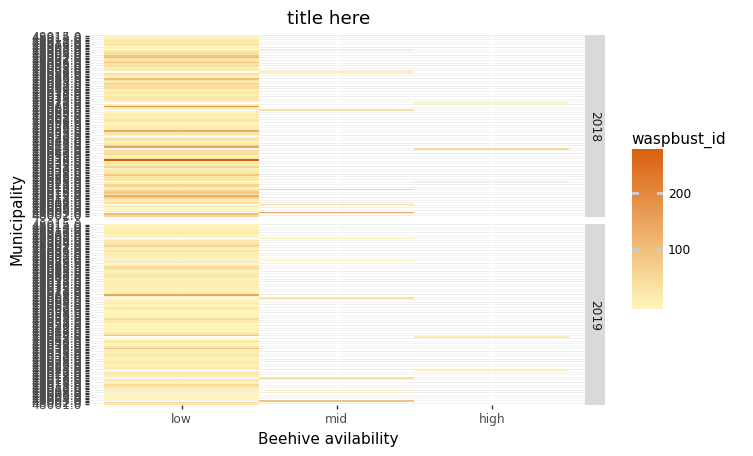

<ggplot: (8736318847973)>

In [ ]:
ggplot(aes(x = 'colonies_range', y = 'municip_code', fill = 'waspbust_id'), coloniesRange_municip_df)\
+ geom_tile()\
+ facet_grid(('year_x', '.'))\
+ xlab("Beehive avilability") + ylab("Municipality") + ggtitle("title here")\
+ scale_fill_gradient(low='#fff7bc', mid='#fec44f', high='#d95f0e')

### Weather variables
Variables: `weath_days_frost`, `weath_humidity`, `weath_maxLevel`, `weath_midLevel`, `weath_minLevel`, `weath_days_rain`, `weath_days_rain1mm`, `weath_accuRainfall`, `weath_10minRainfall`, `weath_1dayRainfall`, `weath_solar`, `weath_meanTemp`, `weath_maxTemp`, `weath_maxMeanTemp`, `weath_minTemp`, `weath_meanWindM`, `weath_maxWindM`, `weath_meanDayMaxWind`

...

In [ ]:
weather_vars = ['weath_days_frost','weath_humidity','weath_maxLevel','weath_midLevel','weath_minLevel','weath_days_rain','weath_days_rain1mm','weath_accuRainfall','weath_10minRainfall','weath_1dayRainfall','weath_solar','weath_meanTemp','weath_maxTemp','weath_maxMeanTemp','weath_minTemp','weath_meanWindM','weath_maxWindM','weath_meanDayMaxWind']

In [ ]:
aux_df = WBdf03.loc[:,['year_x', 'month', 'municip_code', 'waspbust_id', 'weath_humidity']].groupby(by=['year_x', 'month', 'municip_code', 'weath_humidity'], as_index=False).count().dropna()

In [ ]:
aux_df.loc[aux_df.year_x==2018,:].weath_humidity.corr(aux_df.loc[aux_df.year_x==2018,:].waspbust_id)

0.11028558894886248

In [ ]:
aux_df.loc[aux_df.year_x==2019,:].weath_humidity.corr(aux_df.loc[aux_df.year_x==2019,:].waspbust_id)

0.06515637698674763

In [ ]:
aux_df.sort_values(by=['year_x', 'month'], ascending=[1,1])

,year_x,month,municip_code,weath_humidity,waspbust_id
145,2018,1,48001.0,84.4,1.0
235,2018,1,48002.0,71.3,3.0
618,2018,1,48003.0,88.5,6.0
1391,2018,1,48007.0,78.4,2.0
1894,2018,1,48009.0,84.9,1.0
...,...,...,...,...,...
578503,2019,12,48905.0,84.8,3.0
579582,2019,12,48910.0,83.9,2.0
579927,2019,12,48912.0,75.0,1.0
580145,2019,12,48913.0,75.0,1.0


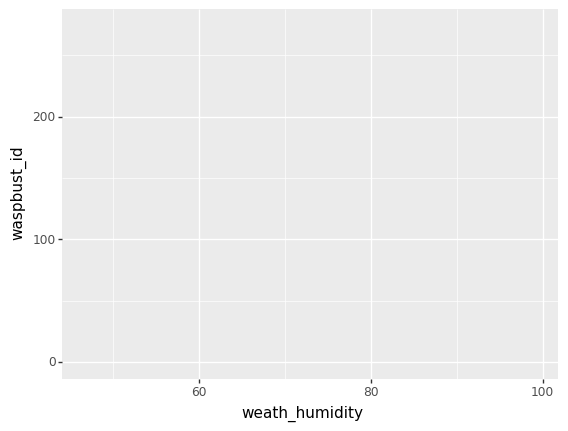

<ggplot: (8786263844897)>

In [ ]:
ggplot(aes(x='weath_humidity', y='waspbust_id'), aux_df) + geom_bar(stat='identity')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_tile : Removed 51 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


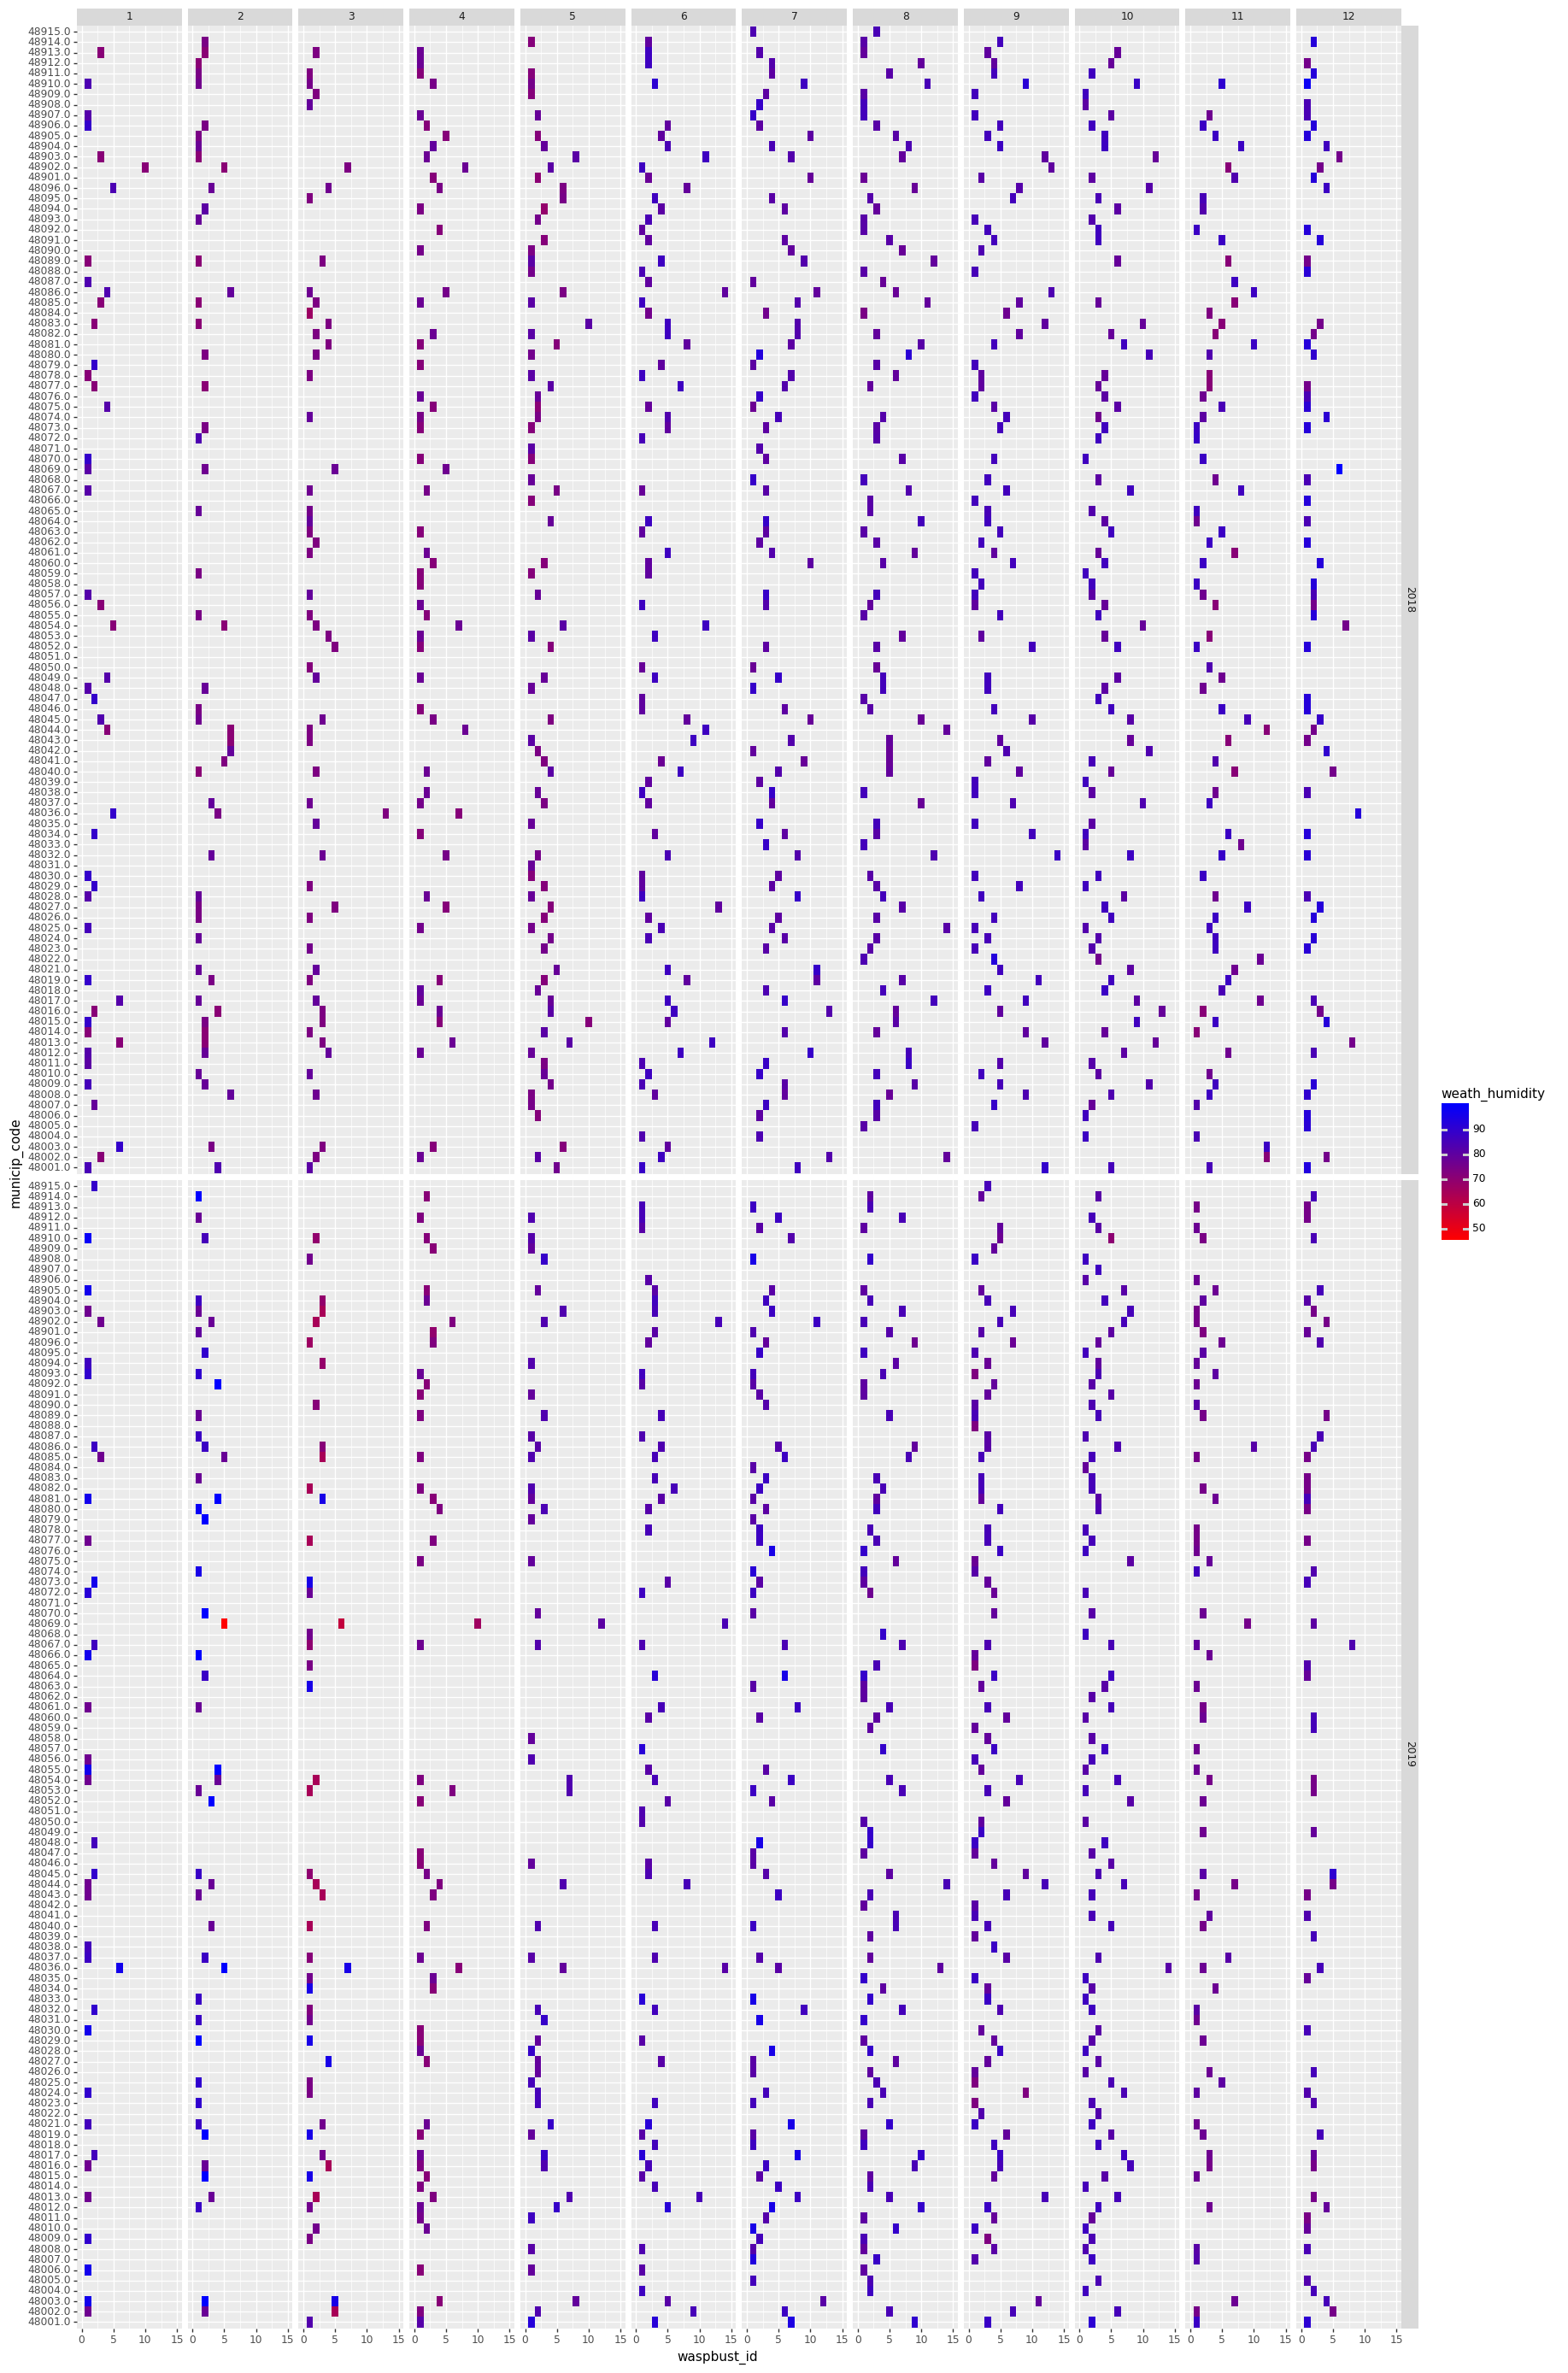

<ggplot: (8746513656617)>

In [ ]:
ggplot(aes(x='municip_code', y='waspbust_id', fill='weath_humidity'), aux_df) + geom_tile() + ylim(0, 15) + facet_grid(('year_x','month'))\
+ theme(figure_size=(20, 35)) + coord_flip()\
+ scale_fill_gradient(low='red', high='blue')\
+ scale_fill_gradient(low='#fff7bc', mid='#fec44f', high='#d95f0e')

In [ ]:
aux_df.agg(['mean', 'median', 'std', lambda x: x.quantile(0.75) - x.quantile(0.25), 'skew', 'kurt', 'max', 'min', 'shape'])

,year_x,month,municip_code,weath_humidity,waspbust_id
mean,2018.45,7.09881,NaN,81.0898,3.95119
median,2018,7,NaN,81,3
std,0.497988,3.16958,NaN,6.00512,4.4971
<lambda>,1,5,58,8.1,4
skew,0.186687,-0.284828,NaN,0.000793986,3.41806
kurt,-1.96749,-0.960683,NaN,0.754875,16.6091
max,2019,12,NaN,99.2,44
min,2018,1,NaN,46.8,1
shape,"(1680,)","(1680,)","(1680,)","(1680,)","(1680,)"


## Dependency

## Expected Values

## How many nests?

In [ ]:
Bilbao_codes = [48020.0, 48013.0, 48084.0, 48078.0, 48082.0, 48092.0, 48054.0, 48004.0]

In [ ]:
WBdf03.loc[WBdf03.municip_code.isin(Bilbao_codes),['year_x', 'municip_name', 'municip_code', 'waspbust_id']].groupby(by=['year_x', 'municip_name', 'municip_code'], as_index=0).count().dropna()

,year_x,municip_name,municip_code,waspbust_id
558,2018,Amoroto,48004.0,5.0
2121,2018,Barakaldo,48013.0,133.0
2532,2018,Bedia,48092.0,14.0
2904,2018,Berriz,48019.0,60.0
7267,2018,Leioa,48054.0,135.0
10177,2018,Portugalete,48078.0,26.0
10292,2018,Santurtzi,48082.0,41.0
10405,2018,Sestao,48084.0,16.0
12990,2019,Amoroto,48004.0,6.0
14553,2019,Barakaldo,48013.0,59.0


In [ ]:
municip_nests_df = WBdf03.loc[:,['year_x', 'municip_name', 'municip_code', 'waspbust_id']].groupby(by=['year_x', 'municip_name', 'municip_code'], as_index=0).count().dropna()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


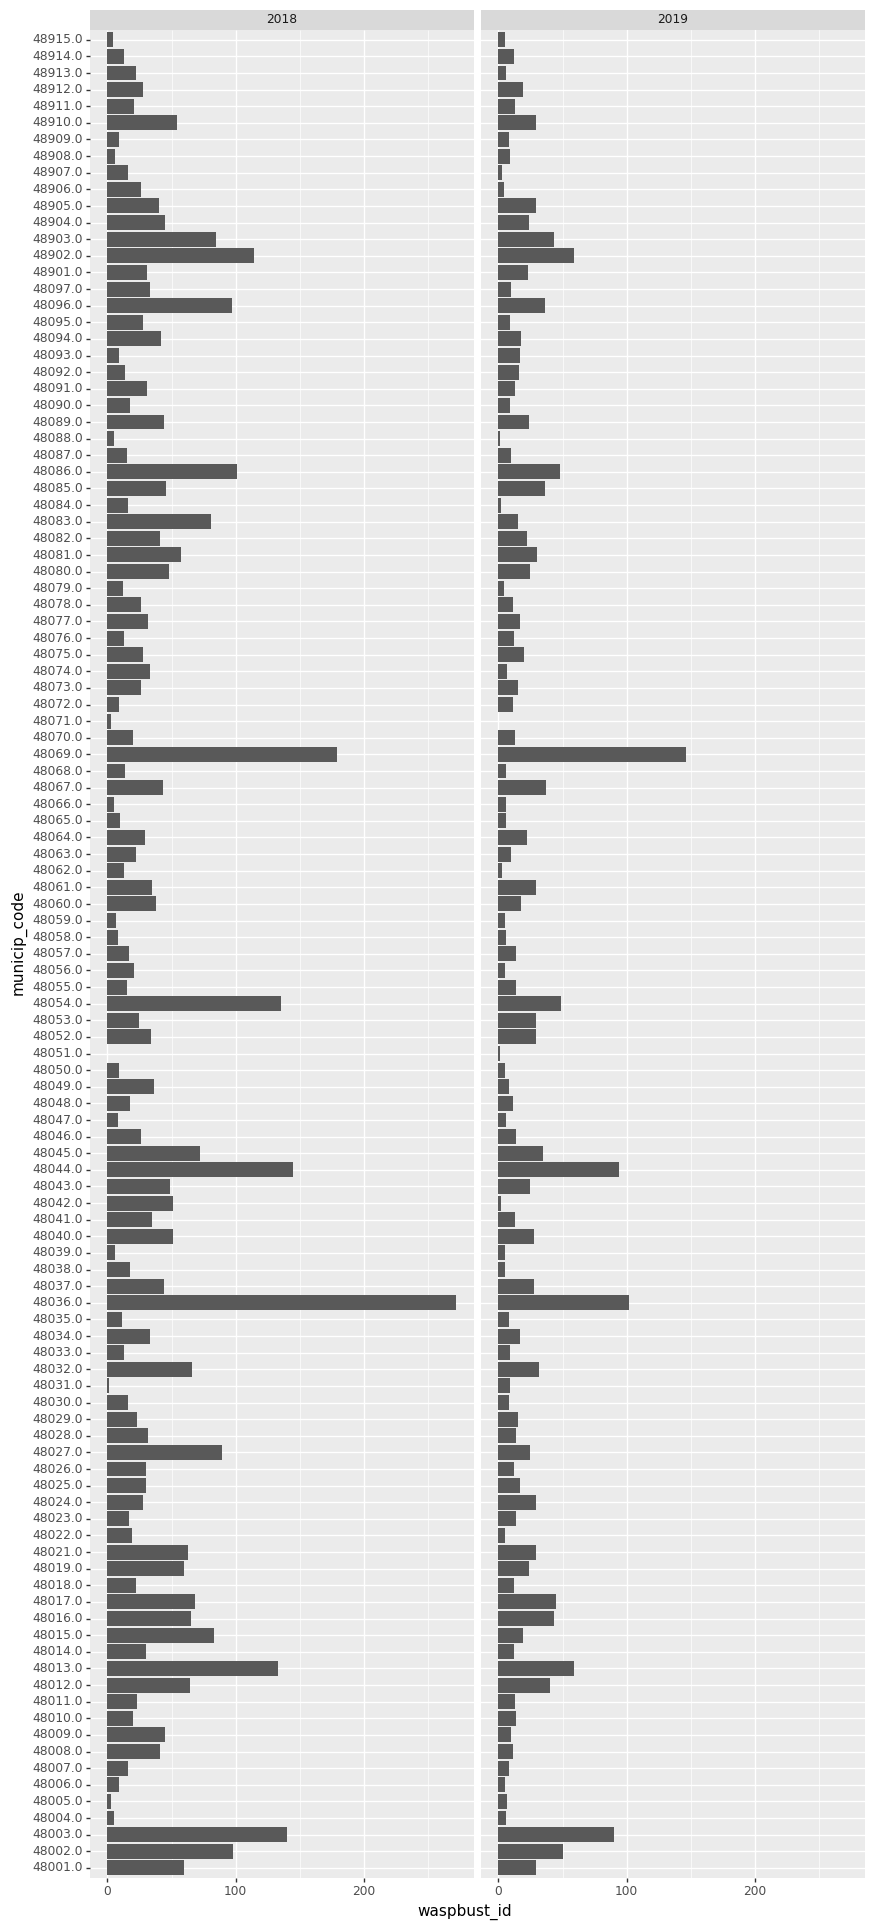

<ggplot: (8746517818009)>

In [ ]:
ggplot(aes(x='municip_code', y='waspbust_id'), municip_nests_df) + geom_bar(stat='identity') + facet_wrap('year_x') + coord_flip()\
+ theme(figure_size=(10, 24))